In [1]:
import ROOT

Module libc not found.


Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooMultiVarGaussian2e_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import matplotlib.pyplot as plt
import numpy as np

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl

In [4]:
import sys
import time

In [5]:
input_dir = 'output-files-bootstrap-test6b-6d-1b'
points_file = 'train-and-true-samples.npy'


#weights_file = 'omnifold-output-weights.npy'
weights_file = 'bootstrap-weights-049.npy'


In [6]:
config_file = '%s/config.txt' % (input_dir)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()
    

In [7]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)



 Number of feature dimensions: 6




In [8]:
with open( '%s/config-pars.npy' % input_dir, 'rb') as f :
    train_mu = np.load(f, allow_pickle=True )
    train_rho = np.load(f, allow_pickle=True)
    train_sig = np.load(f, allow_pickle=True)    
    true_mu = np.load(f, allow_pickle=True )
    true_rho = np.load(f, allow_pickle=True)
    true_sig = np.load(f, allow_pickle=True)  
    resolution = np.load(f, allow_pickle=True)

In [9]:
with open('%s/%s' % (input_dir, points_file),'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)


In [10]:
with open('%s/%s' % (input_dir, weights_file),'rb') as f :
    sample_weights = np.load(f)

In [11]:

nmcevts = len(train_pts)

print( "train_pts shape:  %s" % str(train_pts.shape))
print( "weights:  %s" % str(sample_weights.shape))

print( "number of MC events: %d" % nmcevts)

train_pts shape:  (4000000, 6)
weights:  (4000000,)
number of MC events: 4000000


In [12]:
sample_sf = (1.*len(true_pts))/(1.*len(train_pts))
print('\n sample_sf = %f' % sample_sf )


 sample_sf = 0.100000


In [13]:


true_cov  = np.zeros( shape=(ndim,ndim) )

for i in range(ndim) :
    for j in range(ndim) :
        if j < i : continue
        if i == j :
            true_cov[i][j] = true_sig[i] * true_sig[j]
            print("  %2d, %2d : diagonal  %8.4f" % (i,j, true_cov[i][j]))
        else :
            k = ndim - j - 1
            true_cov[i][j] = true_sig[i] * true_sig[j] * true_rho[i][k]
            true_cov[j][i] = true_cov[i][j]
            print("  %2d, %2d : diagonal  %8.3f * %8.3f * %8.3f = %8.4f" % 
                  (i,j, true_sig[i], true_sig[j], true_rho[i][k], true_cov[i][j]))
            
            
   

   0,  0 : diagonal    0.6400
   0,  1 : diagonal     0.800 *    0.600 *    0.000 =   0.0000
   0,  2 : diagonal     0.800 *    1.000 *    0.200 =   0.1600
   0,  3 : diagonal     0.800 *    0.600 *   -0.200 =  -0.0960
   0,  4 : diagonal     0.800 *    1.000 *    0.100 =   0.0800
   0,  5 : diagonal     0.800 *    1.100 *    0.000 =   0.0000
   1,  1 : diagonal    0.3600
   1,  2 : diagonal     0.600 *    1.000 *    0.000 =   0.0000
   1,  3 : diagonal     0.600 *    0.600 *   -0.100 =  -0.0360
   1,  4 : diagonal     0.600 *    1.000 *    0.200 =   0.1200
   1,  5 : diagonal     0.600 *    1.100 *    0.000 =   0.0000
   2,  2 : diagonal    1.0000
   2,  3 : diagonal     1.000 *    0.600 *    0.000 =   0.0000
   2,  4 : diagonal     1.000 *    1.000 *   -0.300 =  -0.3000
   2,  5 : diagonal     1.000 *    1.100 *    0.400 =   0.4400
   3,  3 : diagonal    0.3600
   3,  4 : diagonal     0.600 *    1.000 *    0.200 =   0.1200
   3,  5 : diagonal     0.600 *    1.100 *    0.000 =   0.000

In [14]:
train_cov  = np.zeros( shape=(ndim,ndim) )

for i in range(ndim) :
    for j in range(ndim) :
        if j < i : continue
        if i == j :
            train_cov[i][j] = train_sig[i] * train_sig[j]
            print("  %2d, %2d : diagonal  %8.4f" % (i,j, train_cov[i][j]))
        else :
            k = ndim - j - 1
            train_cov[i][j] = train_sig[i] * train_sig[j] * train_rho[i][k]
            train_cov[j][i] = train_cov[i][j]
            print("  %2d, %2d : diagonal  %8.3f * %8.3f * %8.3f = %8.4f" % 
                  (i,j, train_sig[i], train_sig[j], train_rho[i][k], train_cov[i][j]))
            
            
   

   0,  0 : diagonal    1.0000
   0,  1 : diagonal     1.000 *    0.700 *    0.100 =   0.0700
   0,  2 : diagonal     1.000 *    1.100 *    0.200 =   0.2200
   0,  3 : diagonal     1.000 *    0.800 *   -0.300 =  -0.2400
   0,  4 : diagonal     1.000 *    1.200 *    0.000 =   0.0000
   0,  5 : diagonal     1.000 *    1.400 *    0.000 =   0.0000
   1,  1 : diagonal    0.4900
   1,  2 : diagonal     0.700 *    1.100 *    0.000 =   0.0000
   1,  3 : diagonal     0.700 *    0.800 *   -0.200 =  -0.1120
   1,  4 : diagonal     0.700 *    1.200 *    0.300 =   0.2520
   1,  5 : diagonal     0.700 *    1.400 *    0.100 =   0.0980
   2,  2 : diagonal    1.2100
   2,  3 : diagonal     1.100 *    0.800 *    0.100 =   0.0880
   2,  4 : diagonal     1.100 *    1.200 *   -0.200 =  -0.2640
   2,  5 : diagonal     1.100 *    1.400 *    0.300 =   0.4620
   3,  3 : diagonal    0.6400
   3,  4 : diagonal     0.800 *    1.200 *    0.100 =   0.0960
   3,  5 : diagonal     0.800 *    1.400 *    0.000 =   0.000

In [15]:
true_cov

array([[ 0.64 ,  0.   ,  0.16 , -0.096,  0.08 ,  0.   ],
       [ 0.   ,  0.36 ,  0.   , -0.036,  0.12 ,  0.   ],
       [ 0.16 ,  0.   ,  1.   ,  0.   , -0.3  ,  0.44 ],
       [-0.096, -0.036,  0.   ,  0.36 ,  0.12 ,  0.   ],
       [ 0.08 ,  0.12 , -0.3  ,  0.12 ,  1.   ,  0.55 ],
       [ 0.   ,  0.   ,  0.44 ,  0.   ,  0.55 ,  1.21 ]])

In [16]:
train_cov

array([[ 1.   ,  0.07 ,  0.22 , -0.24 ,  0.   ,  0.   ],
       [ 0.07 ,  0.49 ,  0.   , -0.112,  0.252,  0.098],
       [ 0.22 ,  0.   ,  1.21 ,  0.088, -0.264,  0.462],
       [-0.24 , -0.112,  0.088,  0.64 ,  0.096,  0.   ],
       [ 0.   ,  0.252, -0.264,  0.096,  1.44 ,  1.176],
       [ 0.   ,  0.098,  0.462,  0.   ,  1.176,  1.96 ]])

## Read in the simple calculation results to set the fit parameter limits.

In [17]:
with open( '%s/simple-calc-results.npy' % input_dir, 'rb') as f :
    sc_ave_mean_val = np.load(f, allow_pickle=True )
    sc_ave_mean_rms = np.load(f, allow_pickle=True)
    sc_ave_cov_val  = np.load(f, allow_pickle=True)    
    sc_ave_cov_rms  = np.load(f, allow_pickle=True )



In [18]:
sc_ave_cov_val

array([[ 0.6599177 ,  0.01367423,  0.1358671 , -0.0903721 ,  0.06503495,
         0.01404829],
       [ 0.        ,  0.39796328, -0.00523508, -0.0356304 ,  0.14194853,
        -0.00703753],
       [ 0.        ,  0.        ,  1.06871231, -0.00311827, -0.30980017,
         0.42446812],
       [ 0.        ,  0.        ,  0.        ,  0.36765506,  0.11923962,
         0.00147429],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.98697275,
         0.54676763],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.20036717]])

In [19]:
print('\n\n')
print('  Simple direct calculation results from the bootstrap samples.\n')

for fi in range(ndim) :
    print('  feature %d  mean:   %8.4f  (true %8.4f) RMS  %8.4f'
         % (fi, sc_ave_mean_val[fi], true_mu[fi], sc_ave_mean_rms[fi]) )
    
print('\n')

for i in range(ndim) :
    for j in range(i,ndim) :
        print('   %d, %d  cov:   %8.4f  (true %8.4f) RMS  %8.4f'
              % ( i, j, sc_ave_cov_val[i][j], true_cov[i,j], sc_ave_cov_rms[i][j]) )

print('\n\n')




  Simple direct calculation results from the bootstrap samples.

  feature 0  mean:     0.8010  (true   0.8000) RMS    0.0029
  feature 1  mean:     0.1075  (true   0.1000) RMS    0.0032
  feature 2  mean:    -0.6232  (true  -0.6000) RMS    0.0037
  feature 3  mean:     0.7044  (true   0.7000) RMS    0.0030
  feature 4  mean:    -0.8063  (true  -0.8000) RMS    0.0041
  feature 5  mean:     0.1089  (true   0.1000) RMS    0.0026


   0, 0  cov:     0.6599  (true   0.6400) RMS    0.0053
   0, 1  cov:     0.0137  (true   0.0000) RMS    0.0021
   0, 2  cov:     0.1359  (true   0.1600) RMS    0.0052
   0, 3  cov:    -0.0904  (true  -0.0960) RMS    0.0040
   0, 4  cov:     0.0650  (true   0.0800) RMS    0.0043
   0, 5  cov:     0.0140  (true   0.0000) RMS    0.0047
   1, 1  cov:     0.3980  (true   0.3600) RMS    0.0033
   1, 2  cov:    -0.0052  (true   0.0000) RMS    0.0049
   1, 3  cov:    -0.0356  (true  -0.0360) RMS    0.0020
   1, 4  cov:     0.1419  (true   0.1200) RMS    0.0048
   1

In [20]:
train_pts

array([[-1.05203063, -0.98470544, -0.4174169 ,  1.31997585, -1.19324066,
         0.08540096],
       [ 1.11064173,  0.00581243, -1.13965258,  0.03800486,  0.28830975,
         0.0865808 ],
       [ 1.8350465 , -0.6086367 ,  0.11009081,  1.02365317, -1.40942085,
         1.27169165],
       ...,
       [ 0.87406194, -1.20371356,  1.54108662,  0.66459211, -2.45378089,
         0.49221018],
       [ 1.34008182, -0.11507163, -0.33175897, -0.25478632, -0.33088859,
         1.60801835],
       [ 1.44619623, -1.48029439, -2.47944382,  1.35055878, -0.0131591 ,
         0.8716515 ]])

In [21]:
train_pts.shape

(4000000, 6)

In [22]:
true_mu

array([ 0.8,  0.1, -0.6,  0.7, -0.8,  0.1])

In [23]:
train_pts_minus_true_mu = train_pts - true_mu
print(train_pts_minus_true_mu)

[[-1.85203063 -1.08470544  0.1825831   0.61997585 -0.39324066 -0.01459904]
 [ 0.31064173 -0.09418757 -0.53965258 -0.66199514  1.08830975 -0.0134192 ]
 [ 1.0350465  -0.7086367   0.71009081  0.32365317 -0.60942085  1.17169165]
 ...
 [ 0.07406194 -1.30371356  2.14108662 -0.03540789 -1.65378089  0.39221018]
 [ 0.54008182 -0.21507163  0.26824103 -0.95478632  0.46911141  1.50801835]
 [ 0.64619623 -1.58029439 -1.87944382  0.65055878  0.7868409   0.7716515 ]]


In [24]:
train_mu

array([ 1. ,  0. , -0.5,  0.5, -1. ,  0.3])

In [25]:
train_pts_minus_train_mu = train_pts - train_mu
print(train_pts_minus_train_mu)

[[-2.05203063 -0.98470544  0.0825831   0.81997585 -0.19324066 -0.21459904]
 [ 0.11064173  0.00581243 -0.63965258 -0.46199514  1.28830975 -0.2134192 ]
 [ 0.8350465  -0.6086367   0.61009081  0.52365317 -0.40942085  0.97169165]
 ...
 [-0.12593806 -1.20371356  2.04108662  0.16459211 -1.45378089  0.19221018]
 [ 0.34008182 -0.11507163  0.16824103 -0.75478632  0.66911141  1.30801835]
 [ 0.44619623 -1.48029439 -1.97944382  0.85055878  0.9868409   0.5716515 ]]


In [26]:
true_cov

array([[ 0.64 ,  0.   ,  0.16 , -0.096,  0.08 ,  0.   ],
       [ 0.   ,  0.36 ,  0.   , -0.036,  0.12 ,  0.   ],
       [ 0.16 ,  0.   ,  1.   ,  0.   , -0.3  ,  0.44 ],
       [-0.096, -0.036,  0.   ,  0.36 ,  0.12 ,  0.   ],
       [ 0.08 ,  0.12 , -0.3  ,  0.12 ,  1.   ,  0.55 ],
       [ 0.   ,  0.   ,  0.44 ,  0.   ,  0.55 ,  1.21 ]])

In [27]:
true_cov_inv = np.linalg.inv( true_cov )

In [28]:
true_cov_inv

array([[ 2.16720735,  0.5238541 , -1.16089127,  1.0492377 , -1.25679098,
         0.99341091],
       [ 0.5238541 ,  3.3098402 , -0.88711059,  0.91158261, -1.32271248,
         0.92381861],
       [-1.16089127, -0.88711059,  2.78705675, -1.16853878,  2.31077013,
        -2.06382524],
       [ 1.0492377 ,  0.91158261, -1.16853878,  3.69119578, -1.62738908,
         1.1646455 ],
       [-1.25679098, -1.32271248,  2.31077013, -1.62738908,  3.47992071,
        -2.42206219],
       [ 0.99341091,  0.92381861, -2.06382524,  1.1646455 , -2.42206219,
         2.67786555]])

In [29]:
inv_check = np.matmul( true_cov, true_cov_inv )

In [30]:
inv_check

array([[ 1.00000000e+00,  1.33027204e-17, -1.95945683e-17,
         4.79800120e-17, -1.36869527e-16, -2.54339557e-17],
       [-1.08006500e-18,  1.00000000e+00,  4.52492704e-17,
         3.38724119e-17, -2.43357366e-17,  1.51970089e-17],
       [ 5.51307525e-17, -1.10979483e-16,  1.00000000e+00,
        -3.19120768e-16,  1.35505791e-16, -1.82910344e-16],
       [-1.08006500e-18, -1.96611062e-17, -1.02618808e-17,
         1.00000000e+00,  3.11754146e-17,  1.51970089e-17],
       [ 1.38485264e-16,  1.13190284e-16, -1.58265634e-16,
        -1.48927315e-17,  1.00000000e+00,  1.41125580e-16],
       [ 8.20377464e-17,  2.20047899e-16, -1.31808609e-16,
        -2.62389617e-16, -3.05207468e-16,  1.00000000e+00]])

In [31]:
true_cov_det = np.linalg.det( true_cov )
print("\n\n true_cov determinant:  %.6f\n" % true_cov_det )



 true_cov determinant:  0.021873



In [32]:
print("train_pts shape:    %s" % str(train_pts.shape))
print("train_pts.T shape:  %s" % str(train_pts.T.shape))

train_pts shape:    (4000000, 6)
train_pts.T shape:  (6, 4000000)


In [33]:
true_cov_inv_times_v = np.tensordot( true_cov_inv, train_pts_minus_true_mu.T, axes=(1,0) )
print("\n\n shape of true_cov_inv_times_v   :  %s\n\n"
     % str(true_cov_inv_times_v.shape))



 shape of true_cov_inv_times_v   :  (6, 4000000)




In [34]:
v_times_true_cov_inv_times_v =  np.sum( train_pts_minus_true_mu.T * true_cov_inv_times_v, axis=0)
print("\n\n shape of v_times_true_cov_inv_times_v   :  %s\n\n"
     % str(v_times_true_cov_inv_times_v.shape))



 shape of v_times_true_cov_inv_times_v   :  (4000000,)




In [35]:

print("\n\n v_times_true_cov_inv_times_v   :   %s\n\n" % v_times_true_cov_inv_times_v )
print("  shape  %s "  % str(v_times_true_cov_inv_times_v.shape))



 v_times_true_cov_inv_times_v   :   [10.26714143  5.01319035  9.77874665 ...  9.8928745   4.97947756
 19.13520068]


  shape  (4000000,) 


In [36]:
train_pts

array([[-1.05203063, -0.98470544, -0.4174169 ,  1.31997585, -1.19324066,
         0.08540096],
       [ 1.11064173,  0.00581243, -1.13965258,  0.03800486,  0.28830975,
         0.0865808 ],
       [ 1.8350465 , -0.6086367 ,  0.11009081,  1.02365317, -1.40942085,
         1.27169165],
       ...,
       [ 0.87406194, -1.20371356,  1.54108662,  0.66459211, -2.45378089,
         0.49221018],
       [ 1.34008182, -0.11507163, -0.33175897, -0.25478632, -0.33088859,
         1.60801835],
       [ 1.44619623, -1.48029439, -2.47944382,  1.35055878, -0.0131591 ,
         0.8716515 ]])

In [37]:
v_times_true_cov_inv_times_v

array([10.26714143,  5.01319035,  9.77874665, ...,  9.8928745 ,
        4.97947756, 19.13520068])

In [38]:
test_v0 = train_pts_minus_true_mu.T[:,0]
print(test_v0)

[-1.85203063 -1.08470544  0.1825831   0.61997585 -0.39324066 -0.01459904]


In [39]:
true_cov_inv

array([[ 2.16720735,  0.5238541 , -1.16089127,  1.0492377 , -1.25679098,
         0.99341091],
       [ 0.5238541 ,  3.3098402 , -0.88711059,  0.91158261, -1.32271248,
         0.92381861],
       [-1.16089127, -0.88711059,  2.78705675, -1.16853878,  2.31077013,
        -2.06382524],
       [ 1.0492377 ,  0.91158261, -1.16853878,  3.69119578, -1.62738908,
         1.1646455 ],
       [-1.25679098, -1.32271248,  2.31077013, -1.62738908,  3.47992071,
        -2.42206219],
       [ 0.99341091,  0.92381861, -2.06382524,  1.1646455 , -2.42206219,
         2.67786555]])

In [40]:
ci_times_tv0 = np.tensordot( true_cov_inv, test_v0, axes=(1,0))

In [41]:
ci_times_tv0

array([-3.66370038, -3.65055022,  2.01810458, -0.23396928,  1.8422479 ,
       -1.58330694])

In [42]:
tv0_times_ci_times_tv0 = np.sum(  test_v0 * ci_times_tv0 )
print( tv0_times_ci_times_tv0 )

10.267141433064449


In [43]:
train_cov_inv = np.linalg.inv( train_cov )
print(train_cov_inv)

[[ 1.27716902  0.1656726  -0.58002342  0.67150396 -0.55879766  0.46371477]
 [ 0.1656726   2.73570114 -0.70653543  0.84055786 -1.35022875  0.83989269]
 [-0.58002342 -0.70653543  1.92056726 -0.8623171   1.7139108  -1.44572485]
 [ 0.67150396  0.84055786 -0.8623171   2.25263852 -1.15105541  0.85186581]
 [-0.55879766 -1.35022875  1.7139108  -1.15105541  3.1303568  -2.2146959 ]
 [ 0.46371477  0.83989269 -1.44572485  0.85186581 -2.2146959   2.13780499]]


In [44]:
train_inv_check = np.matmul( train_cov, train_cov_inv )
print(train_inv_check)

[[ 1.00000000e+00  3.85518982e-17  2.34273303e-17  6.68477293e-18
   2.53037110e-17  1.97785416e-17]
 [ 1.03272453e-18  1.00000000e+00 -7.55439088e-17  5.16034005e-18
  -6.75529269e-17 -1.93778609e-17]
 [-5.54770576e-18 -7.45323110e-17  1.00000000e+00 -1.14316564e-17
   1.14715743e-16 -8.54752621e-17]
 [ 1.38157976e-17  4.85940047e-17 -1.42236179e-16  1.00000000e+00
  -1.15868823e-16  2.48840364e-17]
 [ 1.76911913e-16 -5.16494036e-17  1.23442269e-16 -1.12832472e-16
   1.00000000e+00  1.08182290e-16]
 [ 1.89202179e-16 -1.36396564e-16 -3.20401300e-16 -1.66125856e-16
   6.59260924e-16  1.00000000e+00]]


In [45]:
train_cov_det = np.linalg.det( train_cov )
print("\n\n train_cov determinant : %f\n\n" % train_cov_det )



 train_cov determinant : 0.172508




In [46]:
train_cov_inv_times_v = np.tensordot( train_cov_inv, train_pts_minus_train_mu.T, axes=(1,0) )

In [47]:
v_times_train_cov_inv_times_v =  np.sum( train_pts_minus_train_mu.T * train_cov_inv_times_v, axis=0)

In [48]:
v_times_train_cov_inv_times_v

array([ 6.70489621,  5.41308951,  5.06609778, ...,  6.81647298,
        2.01587609, 12.35390854])

In [49]:
v_times_true_cov_inv_times_v

array([10.26714143,  5.01319035,  9.77874665, ...,  9.8928745 ,
        4.97947756, 19.13520068])

In [50]:
sample_weights

array([0.06540672, 0.24051565, 0.04442722, ..., 0.07559204, 0.04025094,
       0.04593214])

In [51]:
exp_v_times_train_cov_inv_times_v = np.exp( -0.5 * v_times_train_cov_inv_times_v )
exp_v_times_true_cov_inv_times_v  = np.exp( -0.5 * v_times_true_cov_inv_times_v  )
pdf_ratio = exp_v_times_true_cov_inv_times_v / exp_v_times_train_cov_inv_times_v

In [52]:
for i in range(50) :
    print("  %3d :  w %10.6f  pdf ratio %10.6f  r/w = %10.3f  vcv true %10.6f  vcv train %10.6f" 
          % (i, sample_weights[i], pdf_ratio[i], pdf_ratio[i]/sample_weights[i],
             v_times_true_cov_inv_times_v[i], v_times_train_cov_inv_times_v[i] ))

    0 :  w   0.065407  pdf ratio   0.168449  r/w =      2.575  vcv true  10.267141  vcv train   6.704896
    1 :  w   0.240516  pdf ratio   1.221341  r/w =      5.078  vcv true   5.013190  vcv train   5.413090
    2 :  w   0.044427  pdf ratio   0.094768  r/w =      2.133  vcv true   9.778747  vcv train   5.066098
    3 :  w   0.058217  pdf ratio   0.290227  r/w =      4.985  vcv true   5.945569  vcv train   3.471384
    4 :  w   0.137484  pdf ratio   0.381594  r/w =      2.776  vcv true   9.516093  vcv train   7.589296
    5 :  w   0.124665  pdf ratio   0.328954  r/w =      2.639  vcv true   8.042404  vcv train   5.818730
    6 :  w   0.030871  pdf ratio   0.115113  r/w =      3.729  vcv true   9.146694  vcv train   4.823016
    7 :  w   0.140123  pdf ratio   0.674757  r/w =      4.815  vcv true   4.719788  vcv train   3.932982
    8 :  w   0.194579  pdf ratio   0.560770  r/w =      2.882  vcv true   3.020183  vcv train   1.863293
    9 :  w   0.005918  pdf ratio   0.014726  r/w =     

In [53]:
norm2_true = np.power( 3.14159265, ndim) * true_cov_det
print("\n norm2_true : %f\n" % norm2_true )


 norm2_true : 21.028028



In [54]:
norm2_train = np.power( 3.14159265, ndim) * train_cov_det
print("\n norm2_train : %f\n" % norm2_train )


 norm2_train : 165.846901



In [55]:
pdf_train = exp_v_times_train_cov_inv_times_v / np.sqrt(norm2_train)
print(pdf_train)

[0.00271767 0.00518452 0.00616676 ... 0.00257021 0.0283403  0.00016126]


In [56]:
pdf_true = exp_v_times_true_cov_inv_times_v / np.sqrt(norm2_true)
print(pdf_true)

[1.28563974e-03 1.77828051e-02 1.64124293e-03 ... 1.55020924e-03
 1.80850998e-02 1.52561409e-05]


In [57]:
pdf_ratio = pdf_true / pdf_train

In [58]:
calc_weight = sample_sf * pdf_ratio

In [59]:
for i in range(50) :
    print("  %3d :  w %10.6f  calc w %10.6f  r/w = %10.3f  vcv true %10.6f  vcv train %10.6f" 
          % (i, sample_weights[i], calc_weight[i], calc_weight[i]/sample_weights[i],
             v_times_true_cov_inv_times_v[i], v_times_train_cov_inv_times_v[i] ))

    0 :  w   0.065407  calc w   0.047307  r/w =      0.723  vcv true  10.267141  vcv train   6.704896
    1 :  w   0.240516  calc w   0.342998  r/w =      1.426  vcv true   5.013190  vcv train   5.413090
    2 :  w   0.044427  calc w   0.026614  r/w =      0.599  vcv true   9.778747  vcv train   5.066098
    3 :  w   0.058217  calc w   0.081506  r/w =      1.400  vcv true   5.945569  vcv train   3.471384
    4 :  w   0.137484  calc w   0.107166  r/w =      0.779  vcv true   9.516093  vcv train   7.589296
    5 :  w   0.124665  calc w   0.092383  r/w =      0.741  vcv true   8.042404  vcv train   5.818730
    6 :  w   0.030871  calc w   0.032328  r/w =      1.047  vcv true   9.146694  vcv train   4.823016
    7 :  w   0.140123  calc w   0.189497  r/w =      1.352  vcv true   4.719788  vcv train   3.932982
    8 :  w   0.194579  calc w   0.157485  r/w =      0.809  vcv true   3.020183  vcv train   1.863293
    9 :  w   0.005918  calc w   0.004136  r/w =      0.699  vcv true  16.418179  v

<function matplotlib.pyplot.show(close=None, block=None)>

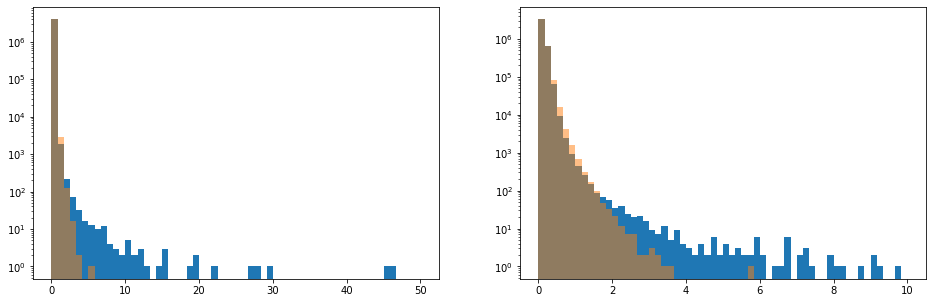

In [60]:
fig,ax = plt.subplots( 1, 2, figsize=(8*2,5))

hbins=60

ax[0].hist( sample_weights, bins=hbins, range=[0,50])
ax[0].hist( calc_weight, bins=hbins, range=[0,50], alpha=0.5 )
ax[0].set_yscale('log')

ax[1].hist( sample_weights, bins=hbins, range=[0,10])
ax[1].hist( calc_weight, bins=hbins, range=[0,10], alpha=0.5 )
ax[1].set_yscale('log')


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

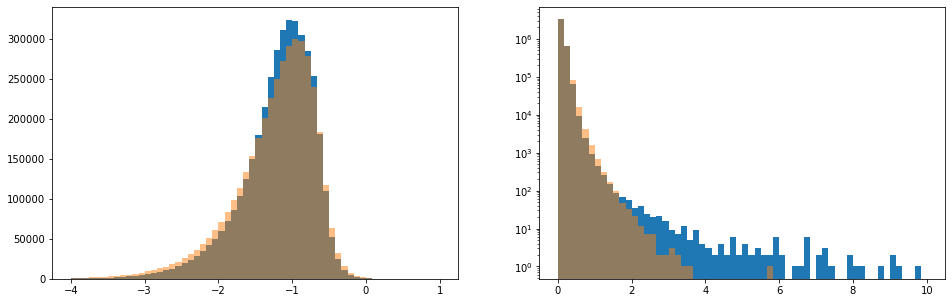

In [61]:
fig,ax = plt.subplots( 1, 2, figsize=(8*2,5))

hbins=60

ax[0].hist( np.log10(sample_weights), bins=hbins, range=[-4,1])
ax[0].hist( np.log10(calc_weight), bins=hbins, range=[-4,1], alpha=0.5 )


ax[1].hist( sample_weights, bins=hbins, range=[0,10])
ax[1].hist( calc_weight, bins=hbins, range=[0,10], alpha=0.5 )
ax[1].set_yscale('log')


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

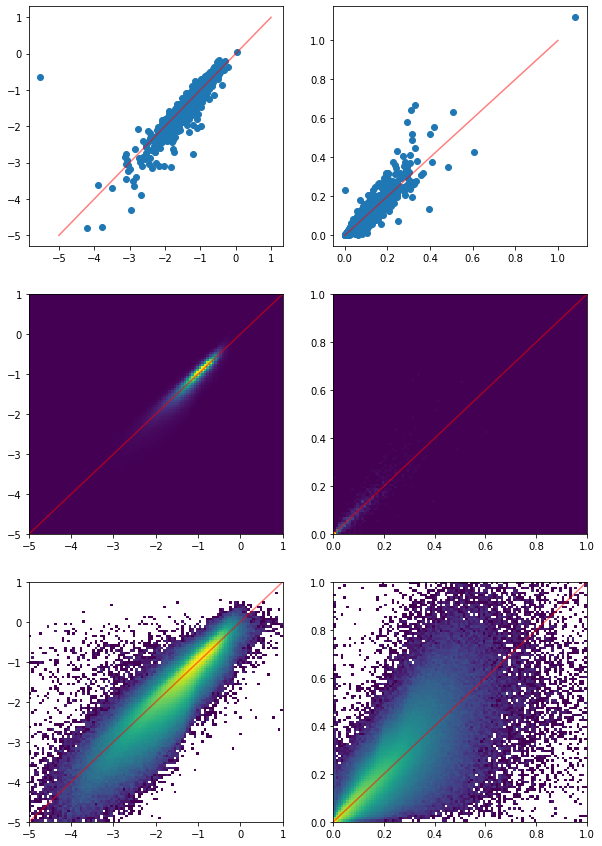

In [62]:
fig,ax = plt.subplots( 3, 2, figsize=(5*2,5*3))

npts=1000
hbins=100

ax[0][0].scatter( np.log10(sample_weights[0:npts]), np.log10(calc_weight[0:npts]))
ax[0][0].plot( (-5,1), (-5,1), color='red', alpha=0.5)

ax[0][1].scatter( sample_weights[0:npts], calc_weight[0:npts] )
ax[0][1].plot( (0,1), (0,1), color='red', alpha=0.5)



ax[1][0].hist2d( np.log10(sample_weights), np.log10(calc_weight), bins=[hbins,hbins], range=([-5,1],[-5,1]) )
ax[1][0].plot( (-5,1), (-5,1), color='red', alpha=0.5)

ax[1][1].hist2d( sample_weights[0:npts], calc_weight[0:npts], bins=[hbins,hbins], range=([0,1],[0,1]) )
ax[1][1].plot( (0,1), (0,1), color='red', alpha=0.5)



ax[2][0].hist2d( np.log10(sample_weights), np.log10(calc_weight), bins=[hbins,hbins], range=([-5,1],[-5,1]), norm=mpl.colors.LogNorm())
ax[2][0].plot( (-5,1), (-5,1), color='red', alpha=0.5)

ax[2][1].hist2d( sample_weights, calc_weight, bins=[hbins,hbins], range=([0,1],[0,1]), norm=mpl.colors.LogNorm() )
ax[2][1].plot( (0,1), (0,1), color='red', alpha=0.5)



plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

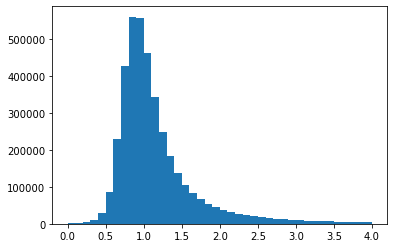

In [63]:
plt.hist( sample_weights/calc_weight, bins=40, range=[0,4])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

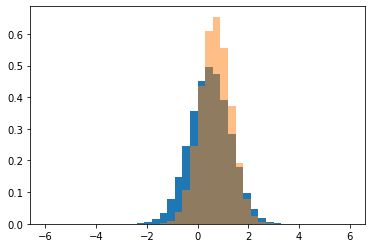

In [64]:
hbins=40
plt.hist( train_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( true_pts[:,3], bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

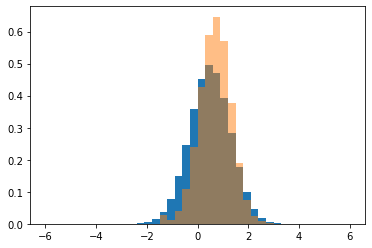

In [65]:
hbins=40
plt.hist( train_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( train_pts[:,3], weights=sample_weights, bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

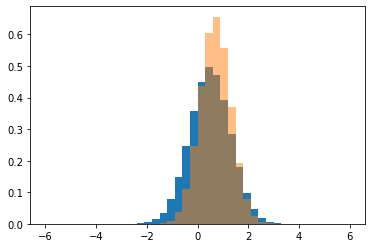

In [66]:
hbins=40
plt.hist( train_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( train_pts[:,3], weights=pdf_ratio, bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

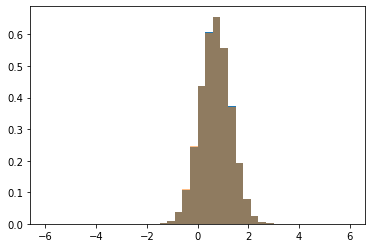

In [67]:
hbins=40
plt.hist( true_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( train_pts[:,3], weights=pdf_ratio, bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

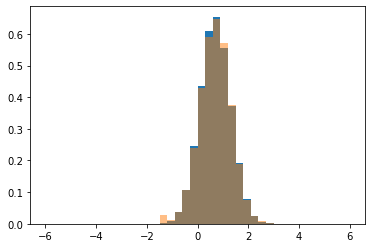

In [68]:
hbins=40
plt.hist( true_pts[:,3], bins=hbins, density=True, range=[-6,6] )
plt.hist( train_pts[:,3], weights=sample_weights, bins=hbins, density=True, range=[-6,6], alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

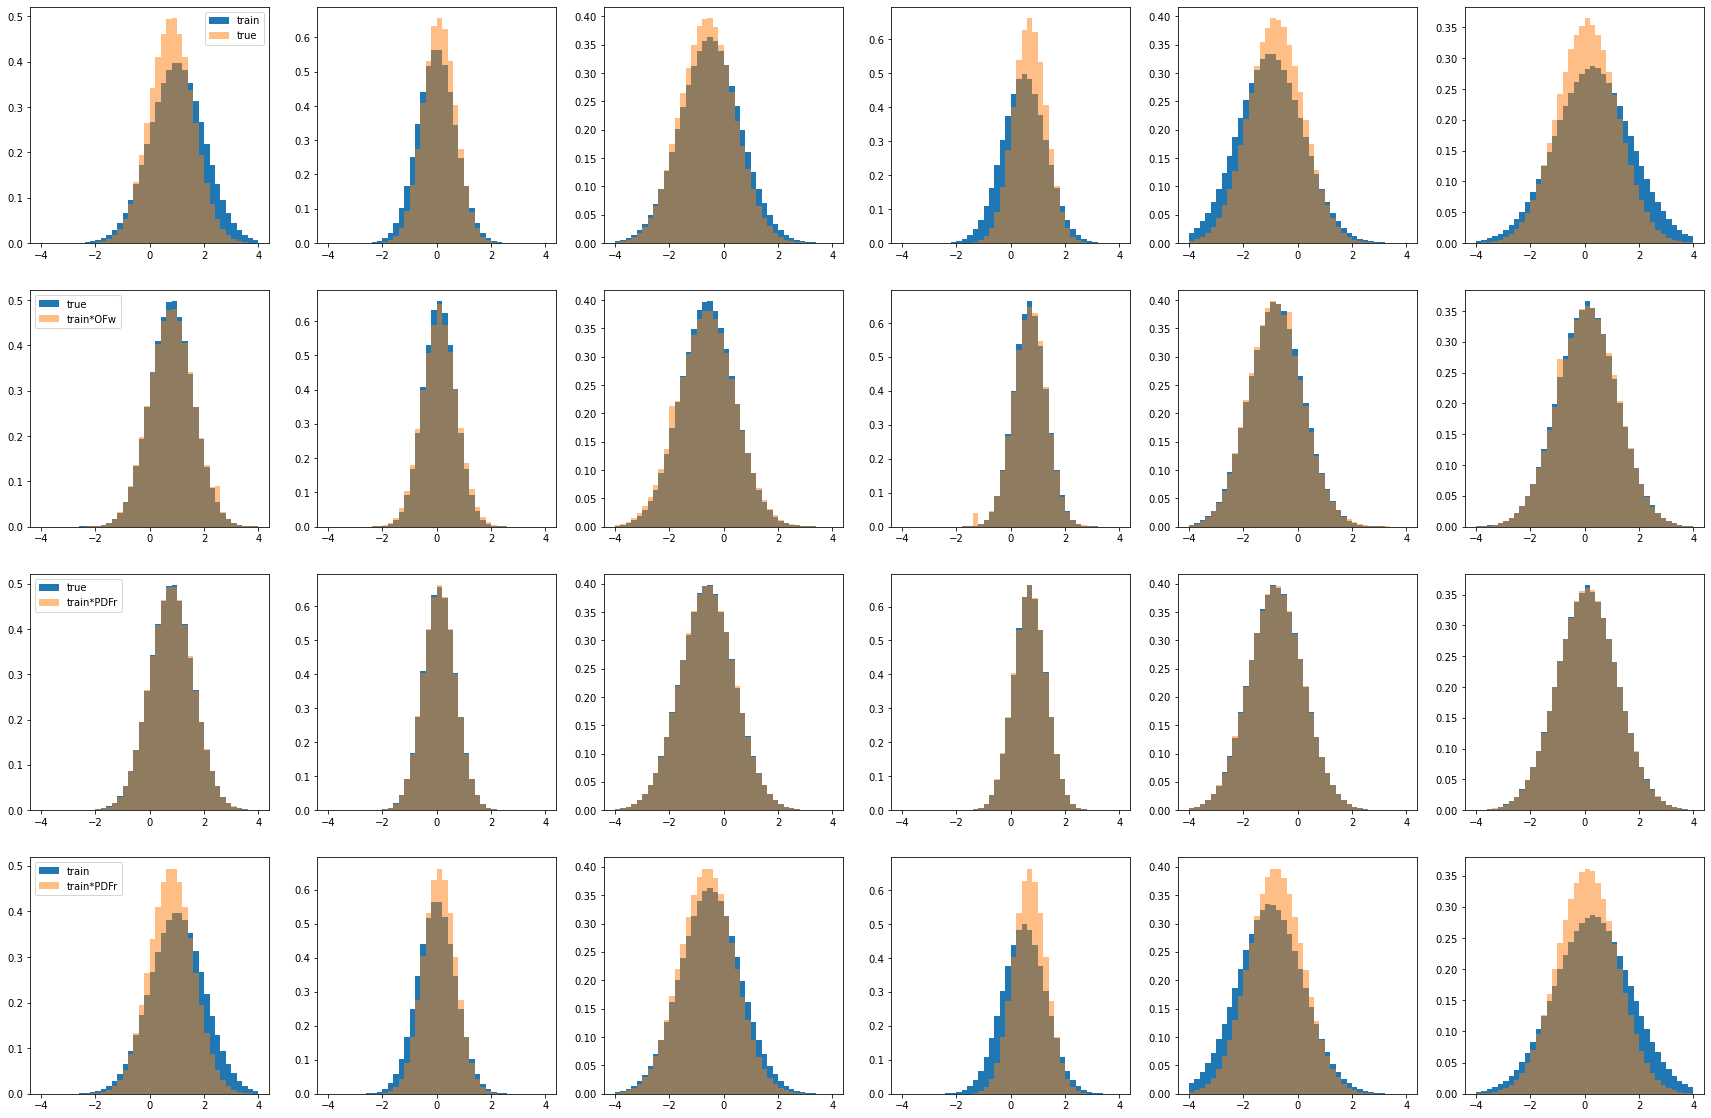

In [69]:
fig,ax = plt.subplots( 4, ndim, figsize=(5*ndim,5*4))

hbins = 40
hxmin = -4
hxmax = 4

for fi in range(ndim) :
    
    ax[0][fi].hist( train_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='train' )
    ax[0][fi].hist( true_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='true', alpha=0.5 )
    
    ax[1][fi].hist( true_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='true')
    ax[1][fi].hist( train_pts[:,fi], weights=sample_weights, bins=hbins, density=True, 
                   label='train*OFw', range=[hxmin,hxmax], alpha=0.5 )

    ax[2][fi].hist( true_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='true' )
    ax[2][fi].hist( train_pts[:,fi], weights=pdf_ratio, bins=hbins, density=True, 
                   label='train*PDFr', range=[hxmin,hxmax], alpha=0.5 )

    ax[3][fi].hist( train_pts[:,fi], bins=hbins, density=True, range=[hxmin,hxmax], label='train' )
    ax[3][fi].hist( train_pts[:,fi], weights=pdf_ratio, bins=hbins, density=True, 
                   label='train*PDFr', range=[hxmin,hxmax], alpha=0.5 )
 

    ax[0][0].legend()
    ax[1][0].legend()
    ax[2][0].legend()
    ax[3][0].legend()
    
plt.show

In [70]:
delta_weight = sample_weights - calc_weight

<function matplotlib.pyplot.show(close=None, block=None)>

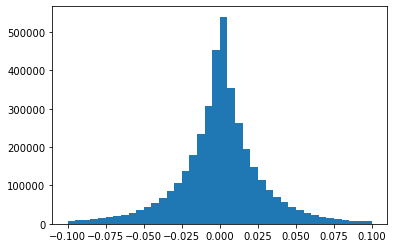

In [71]:
plt.hist( delta_weight, bins=40, range=[-0.1,0.1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

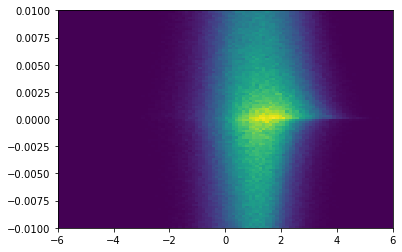

In [72]:
hbins=100
plt.hist2d( train_pts[:,0], delta_weight, bins=[hbins,hbins], range=([-6,6],[-0.01,0.01]))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

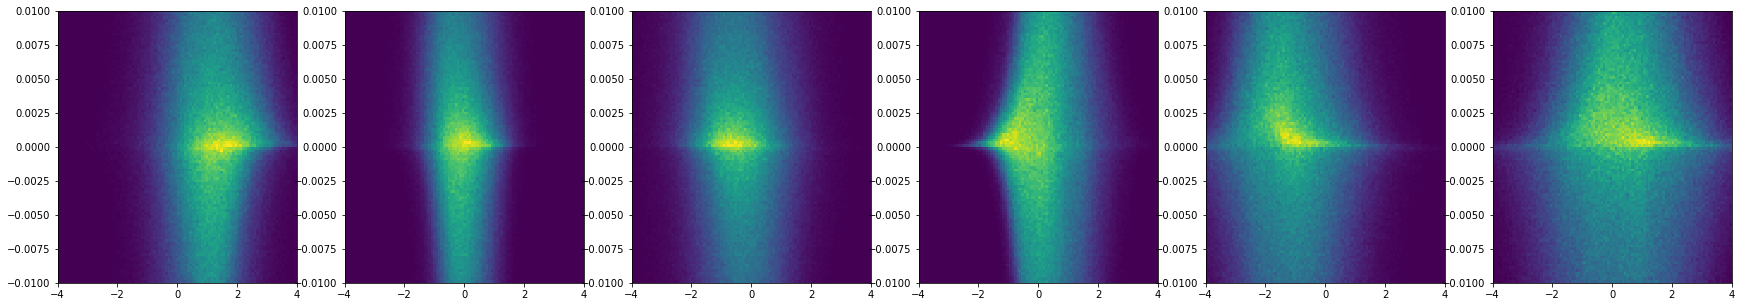

In [73]:
fig,ax = plt.subplots( 1, ndim, figsize=(ndim*5,5))

hxmin=-4
hxmax=4

hbins=100

for fi in range(ndim) :
    ax[fi].hist2d( train_pts[:,fi], delta_weight, bins=[hbins,hbins], range=([hxmin,hxmax],[-0.01,0.01]))
    
plt.show


In [74]:
np.max(sample_weights)

2931.636178000955

In [75]:
calc_weight[sample_weights>30]

array([0.53492185, 0.84492754, 0.01543805, 1.17265324])

In [76]:
sample_weights[sample_weights>30]

array([  46.57541253,   62.61518908, 2931.636178  ,   45.05586714])

In [77]:
calc_weight

array([0.0473067 , 0.34299785, 0.02661434, ..., 0.06031458, 0.06381408,
       0.00946053])

In [78]:
sample_weights

array([0.06540672, 0.24051565, 0.04442722, ..., 0.07559204, 0.04025094,
       0.04593214])